### 1. Importing data

The dataset of choice is the digits dataset. When using scikit-learn, it does not require a download or any external files to access this dataset. Additionally, this means we do not have to deal with preprocessing of the data for this exercise, which definitely saves some time. 

In [17]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
from sklearn import metrics

digits = load_digits()

#### Showing the Images and Labels

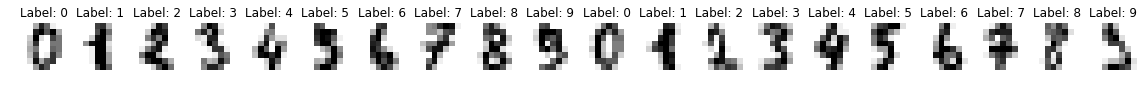

In [18]:
# We print a selection of the images to get acquinted with the dataset
plt.figure(figsize=(20, 2))
for i in range(20):
    plt.subplot(1, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r)
    plt.title('Label: ' + np.array2string(digits.target[i]))
    plt.axis('off')

### 2. Training set and test set

#### k-Nearest Neighbors

As with any machine learning task, the data is split into training and test sets. An extra benefit of using this dataset is that the features and responses are rather straightforward: We will use the training set to learn the relationship between the 8 x 8 pixel information (features) and labels (responses). For future evaluation, we build the models on increasingly large samples of the dataset (10%, 20%, etc.) For each of these steps, we save the accuracy in an array. Similarly, we keep track of the time. 

In [19]:
set_sizes = np.round(np.arange(0.1, 1, 0.1), decimals=3)
knn_accuracy, knn_times = [], []

for set_size in set_sizes:
    # We take a 10%, 20%, etc. subsample of the sets
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(digits.data, digits.target, random_state = 0, test_size = (1 - set_size), train_size= set_size)

    # We split the subsample into training and testing sets with test_size = 0.25
    X_train, X_test, y_train, y_test = train_test_split(X_train_sub, y_train_sub, random_state = 0, test_size=0.25)
    
    # Number of jobs is set to -1 using all processors for parallel jobs to run for neighbors search
    knn = KNeighborsClassifier(n_jobs = -1);
    #Start timing how long the fitting takes
    start_time = time.time()
    _ = knn.fit(X_train, y_train);
    #Stop time and add it to our array
    elapsed_time = time.time() - start_time
    knn_times.append(elapsed_time)
    # We calculate the accuracy by dividing the correct predictions by the total number of images
    knn_accuracy.append(knn.score(X_test, y_test))

We output some k-Nearest Neighbors predictions to take a first look at the predictions of the model.

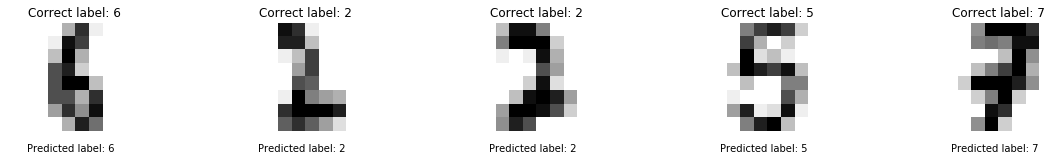

In [20]:
plt.figure(figsize=(20, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(8,8), cmap=plt.cm.gray_r)
    plt.title('Correct label: ' + np.array2string(y_test[i]))
    plt.text(0, 9, 'Predicted label: ' + np.array2string(knn.predict(X_test[i].reshape(1,-1))).lstrip('[').rstrip(']'))
    plt.axis('off')

We also save the predictions for later on.

In [21]:
knn_predict = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)

#### Logistic Regression

We repeat the previous process for logistic regression. 

In [22]:
logreg_times, logreg_accuracy = [], []

for set_size in set_sizes:   
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(digits.data, digits.target, random_state = 0, test_size = (1 - set_size), train_size= set_size)
    X_train, X_test, y_train, y_test = train_test_split(X_train_sub, y_train_sub, random_state = 0, test_size=0.25)

    # For small datasets, ‘liblinear’ is a good choice according to the scikit-learn documentation
    logreg = LogisticRegression(solver = 'liblinear', multi_class = 'auto');
    start_time = time.time()
    _ = logreg.fit(X_train, y_train);
    elapsed_time = time.time() - start_time
    logreg_times.append(elapsed_time)
    logreg_accuracy.append(logreg.score(X_test, y_test))

We output some Logistic Regression predictions to take a first look at the predictions of the model.

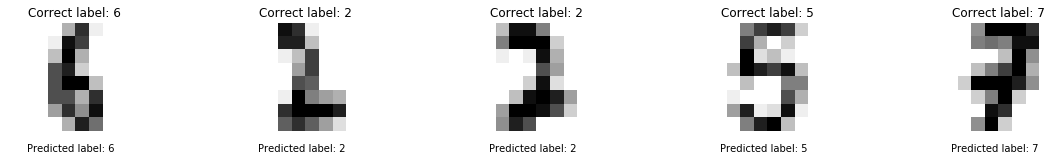

In [23]:
plt.figure(figsize=(20, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(8,8), cmap=plt.cm.gray_r)
    plt.title('Correct label: ' + np.array2string(y_test[i]))
    plt.text(0, 9, 'Predicted label: ' + np.array2string(logreg.predict(X_test[i].reshape(1,-1))).lstrip('[').rstrip(']'))
    plt.axis('off')

We also save the predictions for later on.

In [24]:
logreg_predict = logreg.predict(X_test)
logreg_score = logreg.score(X_test, y_test)

### Random Forest 

We repeat the previous process once more for random forest. 

In [25]:
forest_times, forest_accuracy = [], []

for set_size in set_sizes:   
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(digits.data, digits.target, random_state = 0, test_size = (1 - set_size), train_size= set_size)
    X_train, X_test, y_train, y_test = train_test_split(X_train_sub, y_train_sub, random_state = 0, test_size=0.25)

    forest = RandomForestClassifier(n_jobs = -1, n_estimators = 100);
    start_time = time.time()
    _ = forest.fit(X_train, y_train);
    elapsed_time = time.time() - start_time
    forest_times.append(elapsed_time)
    forest_accuracy.append(forest.score(X_test, y_test))

We output some Random Forest predictions to take a first look at the predictions of the model.

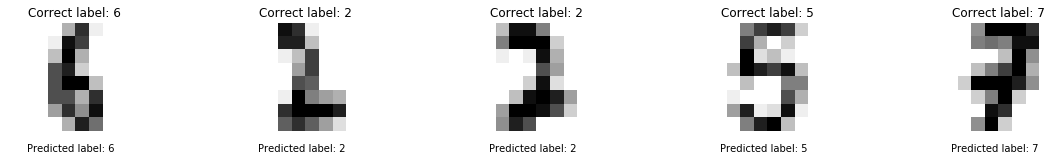

In [26]:
plt.figure(figsize=(20, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(8,8), cmap=plt.cm.gray_r)
    plt.title('Correct label: ' + np.array2string(y_test[i]))
    plt.text(0, 9, 'Predicted label: ' + np.array2string(forest.predict(X_test[i].reshape(1,-1))).lstrip('[').rstrip(']'))
    plt.axis('off')

We also save the predictions for later on.

In [27]:
forest_predict = forest.predict(X_test)
forest_score = forest.score(X_test, y_test)

### 3. Performance evaluation
#### Accuracy
We visualize the accuracy of the three machine learning algorithms. 

In [28]:
df_knn = pd.DataFrame({'size': set_sizes[:9], 'time':knn_times, 'performance': knn_accuracy})
df_logreg = pd.DataFrame({'size': set_sizes[:9], 'time':logreg_times, 'performance': logreg_accuracy})
df_forest = pd.DataFrame({'size': set_sizes[:9], 'time':forest_times, 'performance': forest_accuracy})

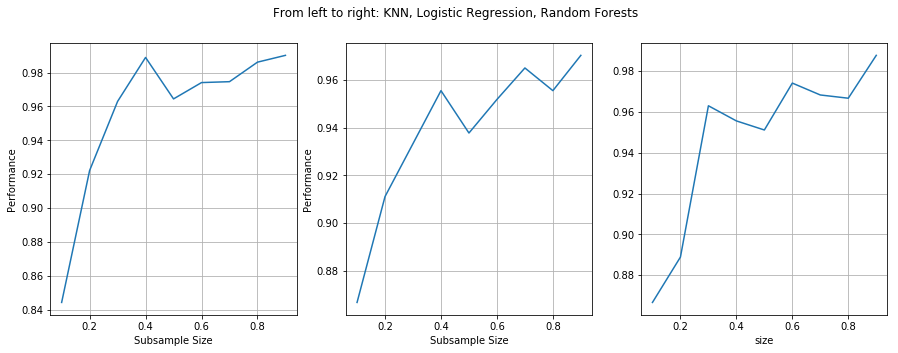

In [29]:
fig, ax = plt.subplots(1, 3, squeeze = False, figsize=(15, 5));

plt.style.use('ggplot')
df_knn.plot(x='size', y='performance', ax = ax[0,0], legend=False);
df_logreg.plot(x='size', y='performance', ax = ax[0,1], legend=False);
df_forest.plot(x='size', y='performance', ax = ax[0,2], legend=False);

for i in range(2):
    ax[0,i].set_ylabel('Performance');
    ax[0,i].set_xlabel('Subsample Size');

fig.suptitle("From left to right: KNN, Logistic Regression, Random Forests");


#### Time to fit
Similarly, we visualize the time needed to fit each subsample. 

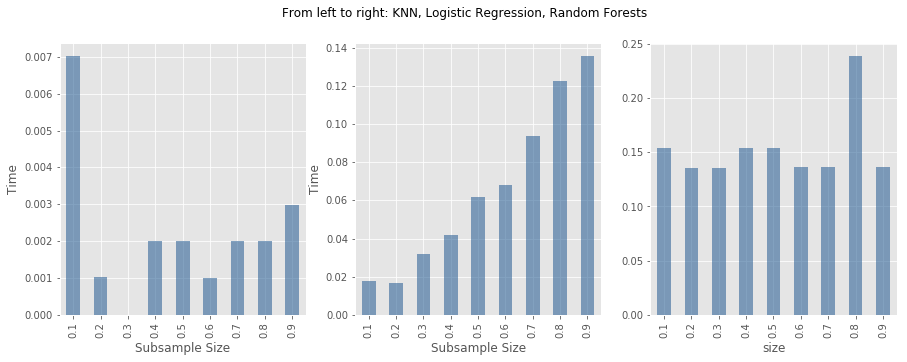

In [30]:
fig, ax = plt.subplots(1, 3, squeeze = False, figsize=(15, 5));

plt.style.use('ggplot')
df_knn.plot(kind = 'bar', color=(0.2, 0.4, 0.6, 0.6), x='size', y='time', ax = ax[0,0], legend=False);
df_logreg.plot(kind = 'bar', color=(0.2, 0.4, 0.6, 0.6), x='size', y='time', ax = ax[0,1], legend=False);
df_forest.plot(kind = 'bar', color=(0.2, 0.4, 0.6, 0.6), x='size', y='time', ax = ax[0,2], legend=False);

for i in range(2):
    ax[0,i].set_ylabel('Time');
    ax[0,i].set_xlabel('Subsample Size');

fig.suptitle("From left to right: KNN, Logistic Regression, Random Forests");

#### Confusion Matrix

We also use a confusion matrix to evaluate the performance of the model. Through the confusion matrix, we can spot where the model made mistakes. From the confusion matrix, we can also see if the model made more mistakes in one class than another class. If needed, we can adjust the model accordingly. 

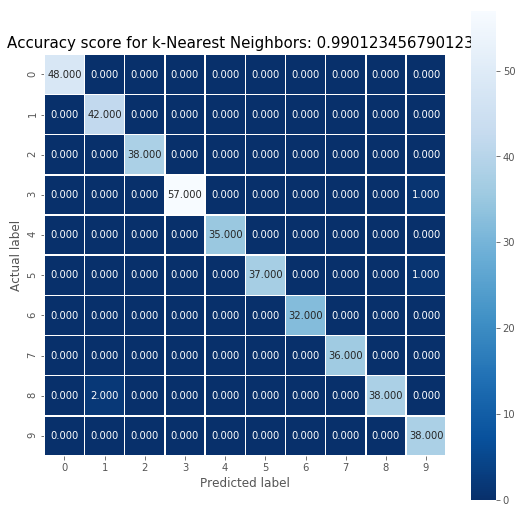

In [31]:
cm = metrics.confusion_matrix(y_test, knn_predict)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score for k-Nearest Neighbors: {0}'.format(knn_score)
plt.title(all_sample_title, size = 15);

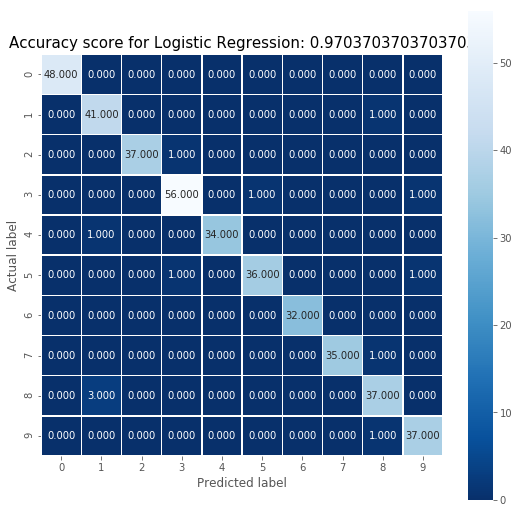

In [32]:
cm = metrics.confusion_matrix(y_test, logreg_predict)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score for Logistic Regression: {0}'.format(logreg_score)
plt.title(all_sample_title, size = 15);

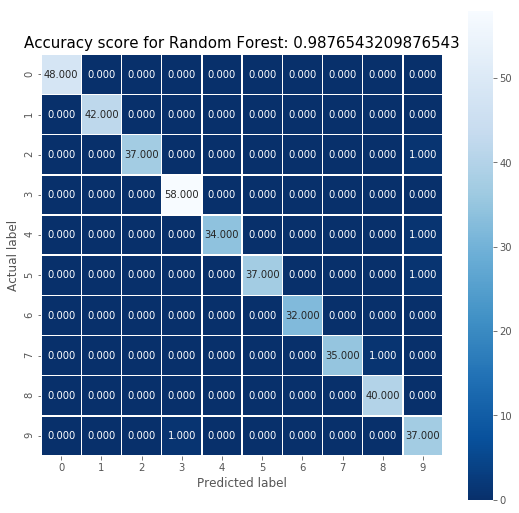

In [33]:
cm = metrics.confusion_matrix(y_test, forest_predict)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score for Random Forest: {0}'.format(forest_score)
plt.title(all_sample_title, size = 15);